In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Explore
Let's start to understand what the dataset is about? how many values are there? and what type of data is stored?

In [ ]:
#Reading the data set from the source.

df = pd.read_csv("ambient_temperature_system_failure.csv")
#df = pd.read_csv("https://github.com/numenta/NAB/blob/master/data/realKnownCause/ambient_temperature_system_failure.csv?raw=true")
df.head()
#Starts from 4th of July 2013

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [ ]:
df.tail()
#Ends at 28th May 2014

,timestamp,value
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226
7266,2014-05-28 15:00:00,72.584089


In [ ]:
# To check how many values are there and what is the datatype
df.describe

<bound method NDFrame.describe of                 timestamp      value
0     2013-07-04 00:00:00  69.880835
1     2013-07-04 01:00:00  71.220227
2     2013-07-04 02:00:00  70.877805
3     2013-07-04 03:00:00  68.959400
4     2013-07-04 04:00:00  69.283551
...                   ...        ...
7262  2014-05-28 11:00:00  72.370206
7263  2014-05-28 12:00:00  72.172956
7264  2014-05-28 13:00:00  72.046565
7265  2014-05-28 14:00:00  71.825226
7266  2014-05-28 15:00:00  72.584089

[7267 rows x 2 columns]>

In [ ]:
#Checking if there are any missing values or NAs
df['value'].isna().sum()
df['timestamp'].isna().sum()
#Since the sum is 0 so no NA values in the dataset

0

Since the timestamp is object type and  its very difficult to work using it so, will convert to pandas datetime format

In [ ]:
#Converting the timestamp as date time format.
df['timestamp'] = pd.to_datetime(df['timestamp'], format ='%Y-%m-%d %H:%M:%S')

In [ ]:
#To view earliest and latest date 
print(df['timestamp'].min())
print(df['timestamp'].max())
# To find number of days 
print(df['timestamp'].max()-df['timestamp'].min())

2013-07-04 00:00:00
2014-05-28 15:00:00
328 days 15:00:00


Lets try to plot graph for initial 72 hours to better understand is there is a visible pattern.

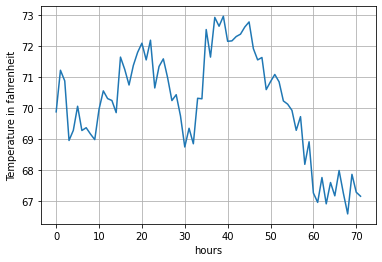

In [ ]:
df['value'].head(72).plot()
#plt.grid()
plt.xlabel('hours')
plt.ylabel('Temperature in fahrenheit')
plt.grid()
plt.show()

# Feature Engineering
## Since we have only 1 feature the temperature and inorder to better undersand the seasonality, repetation and pattern we would require more time components, I have created a  modified data frame, with additional features. 


In [ ]:
modified_df = df
modified_df['DayOfWeek'] = df['timestamp'].dt.day_name()
modified_df['month'] = df['timestamp'].dt.month
modified_df['hour'] = df['timestamp'].dt.hour 
modified_df['DayOfMonths'] = df['timestamp'].dt.days_in_month

modified_df['rolling_mean'] = modified_df['value'].rolling(window=5).mean()
modified_df

,timestamp,value,DayOfWeek,month,hour,DayOfMonths,rolling_mean
0,2013-07-04 00:00:00,69.880835,Thursday,7,0,31,NaN
1,2013-07-04 01:00:00,71.220227,Thursday,7,1,31,NaN
2,2013-07-04 02:00:00,70.877805,Thursday,7,2,31,NaN
3,2013-07-04 03:00:00,68.959400,Thursday,7,3,31,NaN
4,2013-07-04 04:00:00,69.283551,Thursday,7,4,31,70.044364
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,Wednesday,5,11,31,68.795489
7263,2014-05-28 12:00:00,72.172956,Wednesday,5,12,31,70.100905
7264,2014-05-28 13:00:00,72.046565,Wednesday,5,13,31,71.015705
7265,2014-05-28 14:00:00,71.825226,Wednesday,5,14,31,71.774134


# Creating a dataframe to find hour wise variations in the averge temperature.

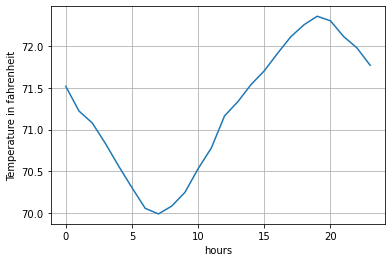

In [ ]:
temp_df_hour = pd.DataFrame()
temp_df_hour['value'] = modified_df.groupby(modified_df['hour']).value.mean()

#hourly_mean = [] 

plt.plot(range(temp_df_hour.shape[0]), temp_df_hour['value'])
plt.xlabel('hours')
plt.ylabel('Temperature in fahrenheit')
plt.grid()
plt.show()

As can be seen, the data demonstrates a sinusoidal trend in  avearge daily temperature. The averages temperature is lowest in early morning, and highest at night which makes sense as the data is of ambient temperature in office setting.Analyzing the data we cane see that at night the average temperature drops and rises again during the day.


Trying to understand whether there is some weekly pattern in the temperature data.

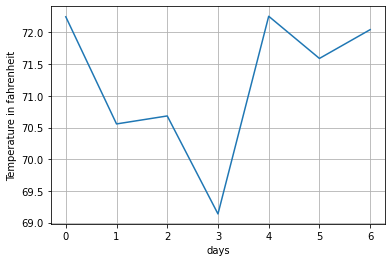

In [ ]:
temp_df_daily = pd.DataFrame()
temp_df_daily['value'] = modified_df.groupby(modified_df['DayOfWeek']).value.mean()

plt.plot(range(temp_df_daily.shape[0]), temp_df_daily['value'])
plt.xlabel('days')
plt.ylabel('Temperature in fahrenheit')
plt.grid()
plt.show()

Plotting the graph for monthly average to understand if there is some seasonal pattern in variation of the temperature.

[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]


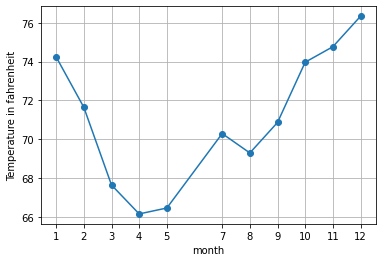

In [ ]:
temp_df_month = pd.DataFrame()

temp_df_month['value'] = modified_df.groupby(modified_df['month']).value.mean()

monthly_mean = [] 

temp = temp_df_month['value'].to_list()

set1 = list(range(1, 6))
set2 = list(range(7, 13))


plt.plot(set1+set2, temp_df_month, linestyle='-', marker='o')

months =  set2 + set1
print(months)
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('Temperature in fahrenheit')
plt.grid()
plt.show()

Observations in the above graph:
1. There is is some seasonal variation in the temperature.
2. The average temperature at 4th  and 5th month from the start is the lowest, since the data starte with July, so it means the lowest temperatures are in November and December.
3. The change could be because of seasonal changes, however inorder to infer something we need more data.

# Visualising the data

## Box plot is a good way to visualise data as it provides, 5 good indicator of the data as well as about the outlier that are beyond the whiskers.
This is evident from the below graphs as well.

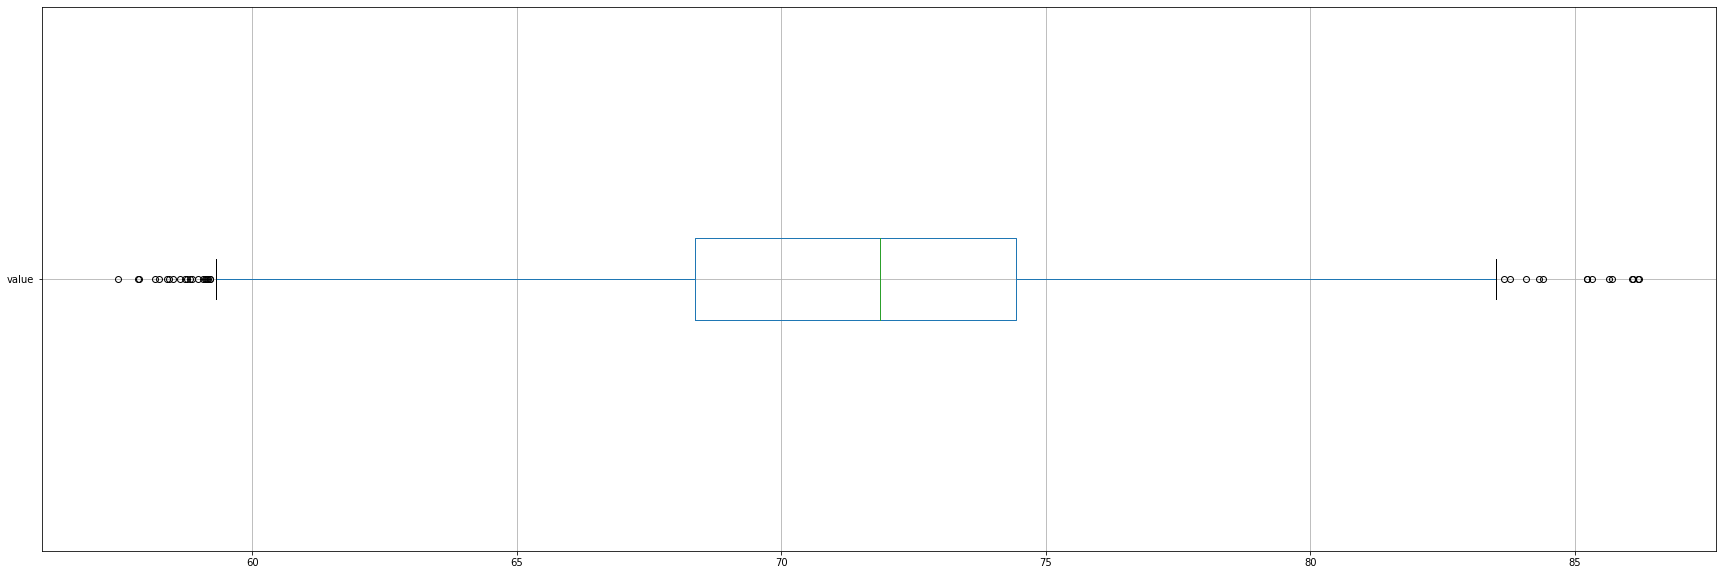

In [ ]:
plt.figure(figsize = (30,10))
df.boxplot( column =['value'], grid = True,vert=False)

In [ ]:
modified_df['value'].describe()

count    7267.000000
mean       71.242433
std         4.247509
min        57.458406
25%        68.369411
50%        71.858493
75%        74.430958
max        86.223213
Name: value, dtype: float64

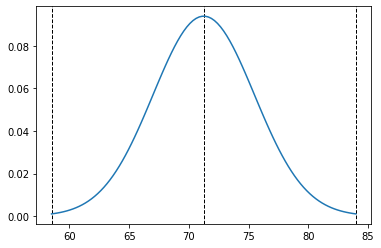

In [ ]:
mu = 71.242433 # mean from above 
sigma = 4.247509 # standard deviation from above.
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# matplotlib histogram
#plt.hist(df['value'], color = 'yellow', edgecolor = 'green',
 #        bins = 100)
plt.axvline(mu-3*sigma, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mu+3*sigma, color='k', linestyle='dashed', linewidth=1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

If the data follow a normal distribution in that case the graph would look something like above, assuming the ideal data to follow normal distribution with the mean and standard deviation we calculated, we could see 2 lines representing the data which are 3  standard deviation away from mean or the outlier.

Text(70, 255, '71.242433')

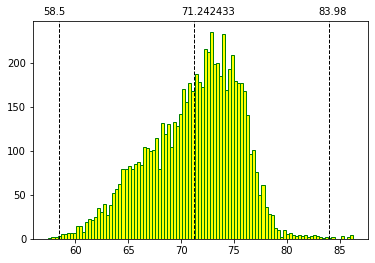

In [ ]:
# matplotlib histogram
plt.hist(df['value'], color = 'yellow', edgecolor = 'green',
        bins = 100)
plt.axvline(mu-3*sigma, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)

plt.axvline(mu+3*sigma, color='k', linestyle='dashed', linewidth=1)

str1 = str(round(mu-3*sigma,2))
str2 = str(round(mu+3*sigma,2))
plt.text(57, 255,str1 , fontdict=None)
plt.text(83, 255,str2 , fontdict=None)
plt.text(70, 255,mu , fontdict=None)

## Anomaly Detection - Statistical Model

The points which are beyong 3 standard deviation away from the mean, for all the data set are generally very less likely to occurs and can be considered as anamoly.( Could also be explained based on their individual Z score values)

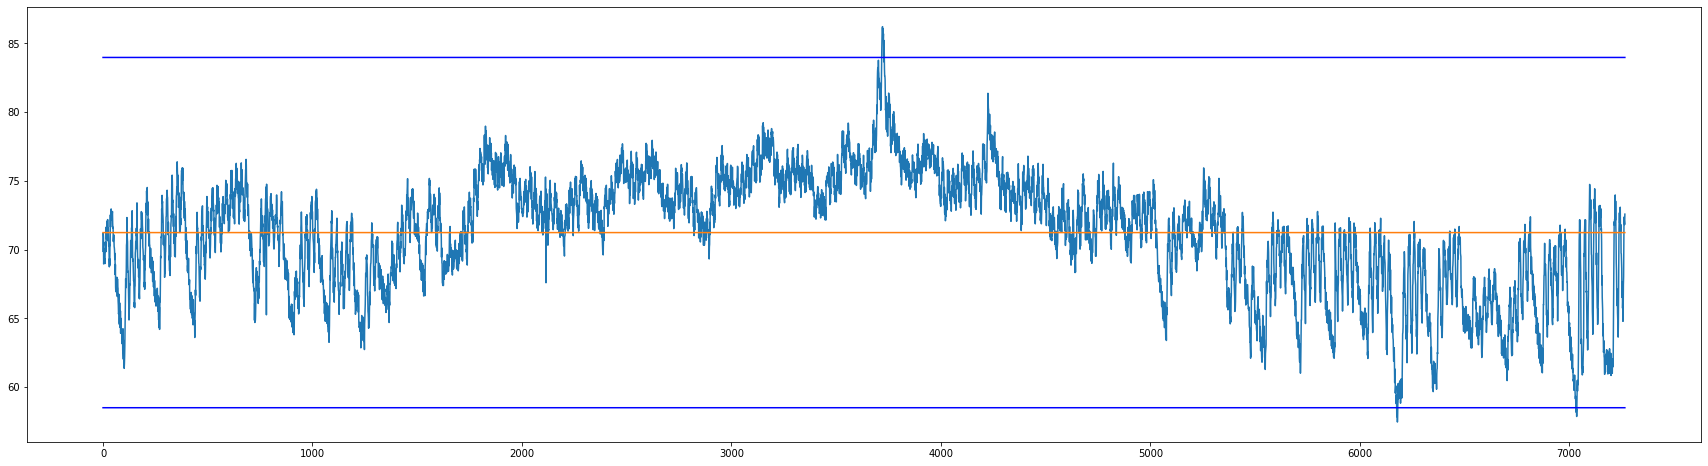

In [ ]:
#If we assume the data follows normal distrivution then the point above and below the two blue lines.
plt.figure(figsize = (30,8))

df['value'].plot(kind = "line")
plt.plot(range(df.shape[0]),df.shape[0]*[mu])
plt.plot(range(df.shape[0]),df.shape[0]*[mu-3*sigma],'b')
plt.plot(range(df.shape[0]),df.shape[0]*[mu+3*sigma],'b')
plt.show()
#partial_df1['value'].plot()


#modified_df['value'].groupby(modified_df['month']).mean().plot()
#modified_df.head()

In [ ]:
#The values which are beyond 3 Standarad Deviation away from the means are possible anomaly or outlier:

yearly_Highervalues = df[df['value']>=mu+3*sigma]
yearly_Lowervalues = df[df['value']<=mu-3*sigma]

In [ ]:
print(yearly_Highervalues.month)
print(yearly_Lowervalues.month)

3718    12
3719    12
3720    12
3721    12
3722    12
3723    12
3724    12
3725    12
3726    12
3727    12
3728    12
3730    12
Name: month, dtype: int64
6177    4
6178    4
6180    4
6181    4
7034    5
7035    5
7036    5
Name: month, dtype: int64


Now, lets see if we do similar for monthly datasets, to identify outlier as can be seen from the  graph that November December, so it could more of seasonal outlier, with monthly dataframe this would also me taken into consideration.

In [ ]:
month = {1:'January',
         2:'February',
         3:'March',
         4:'April',
         5:'May',
         7:'July',
         8:'August',
         9:'September',
         10:'October',
         11:'November',
         12:'December'}


def compute_mean_and_std(month_number):
    global monthly_Highervalues
    global monthly_Lowervalues
    monthly_slice = modified_df[modified_df['month']==month_number]
    
    #monthly_slice['timestamp'] = pd.to_datetime(df['timestamp'], format ='%Y-%m-%d %H:%M:%S')
    
    plt.plot(range(monthly_slice.index[0], monthly_slice.index[-1]+1),monthly_slice['value'], 'x')
    plt.title('avg monthly temperature :'+str(month.get(month_number)))
    mu = monthly_slice['value'].mean()
    sigma = monthly_slice['value'].std()

  
    plt.grid()
    print(monthly_slice.index[0], monthly_slice.index[-1], monthly_slice.shape[0])
    x = np.linspace(monthly_slice.index[0], monthly_slice.index[-1]+1, monthly_slice.shape[0])
    dates = monthly_slice['timestamp']
    
    sampled_ticks = np.linspace(monthly_slice.index[0]+1, monthly_slice.index[-1]+1)
    
    sampled_ticks = [int(iter) for iter in sampled_ticks]

    modified_dates = [dates[samp-1] for samp in sampled_ticks]
    

    plt.xticks(sampled_ticks,
               modified_dates, 
               rotation=90)
    
    plt.plot(x, monthly_slice.shape[0]*[mu])
    plt.plot(x, monthly_slice.shape[0]*[mu-3*sigma],'b')
    plt.plot(x, monthly_slice.shape[0]*[mu+3*sigma],'b')

    x_ano_plus = monthly_slice[monthly_slice['value']>= mu+3*sigma].index
    y_ano_plus = monthly_slice[monthly_slice['value']>= mu+3*sigma].value
    plt.scatter(x_ano_plus, y_ano_plus, marker="o", facecolor= "r", edgecolor="r")

    x_ano_minus = monthly_slice[monthly_slice['value']<= mu-3*sigma].index
    y_ano_minus = monthly_slice[monthly_slice['value']<= mu-3*sigma].value
    plt.scatter(x_ano_minus, y_ano_minus, marker="o", facecolor= "r", edgecolor="r")

    plt.xlabel('TimeStamp')
    plt.ylabel('Temperature')
    
    plt.show()

    print(monthly_slice[monthly_slice['value']<= mu-3*sigma])
    monthly_Highervalues = monthly_Highervalues.append(monthly_slice[monthly_slice['value']<= mu-3*sigma])
    print(monthly_slice[monthly_slice['value']>= mu+3*sigma])
    monthly_Lowervalues = monthly_Lowervalues.append(monthly_slice[monthly_slice['value']>= mu+3*sigma])



0 639 640


<Figure size 1440x1440 with 0 Axes>

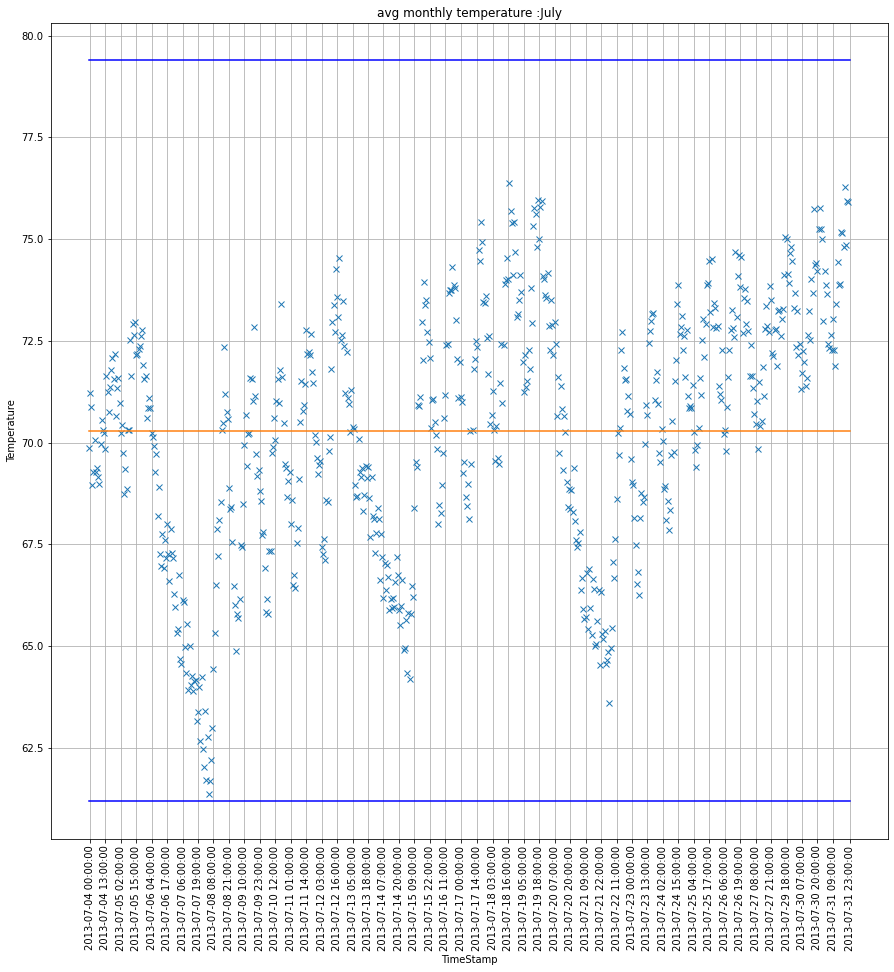

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
640 1336 697


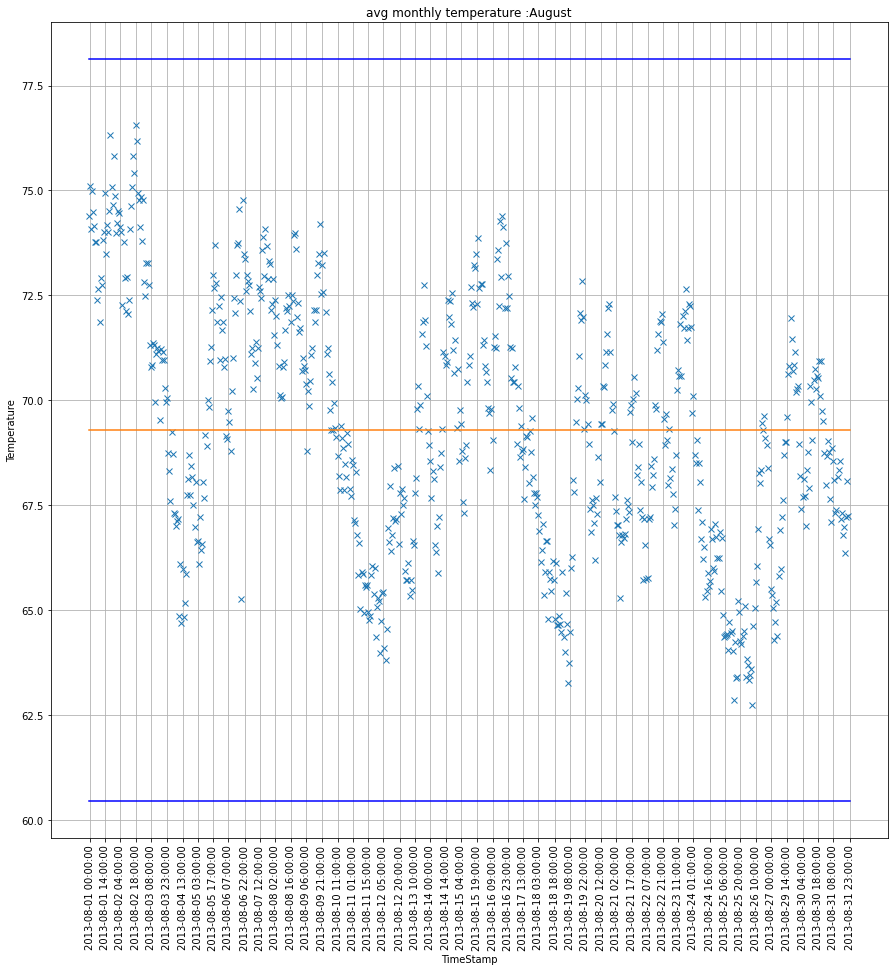

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
1337 1814 478


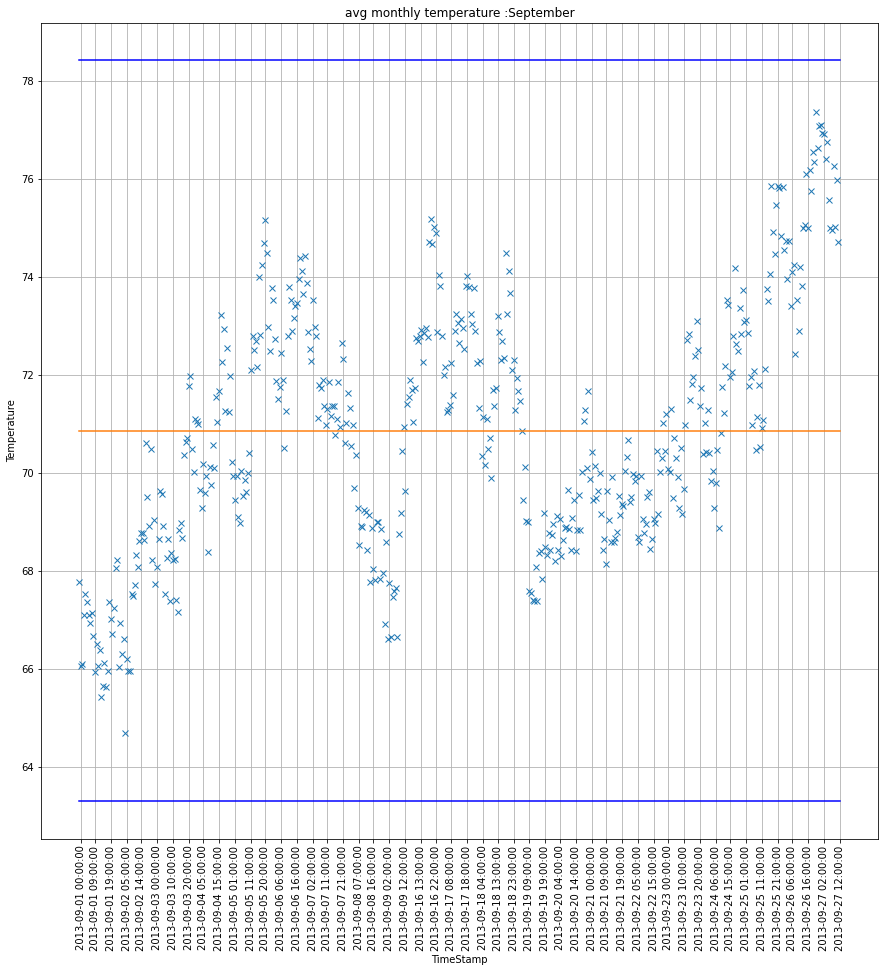

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
1815 2476 662


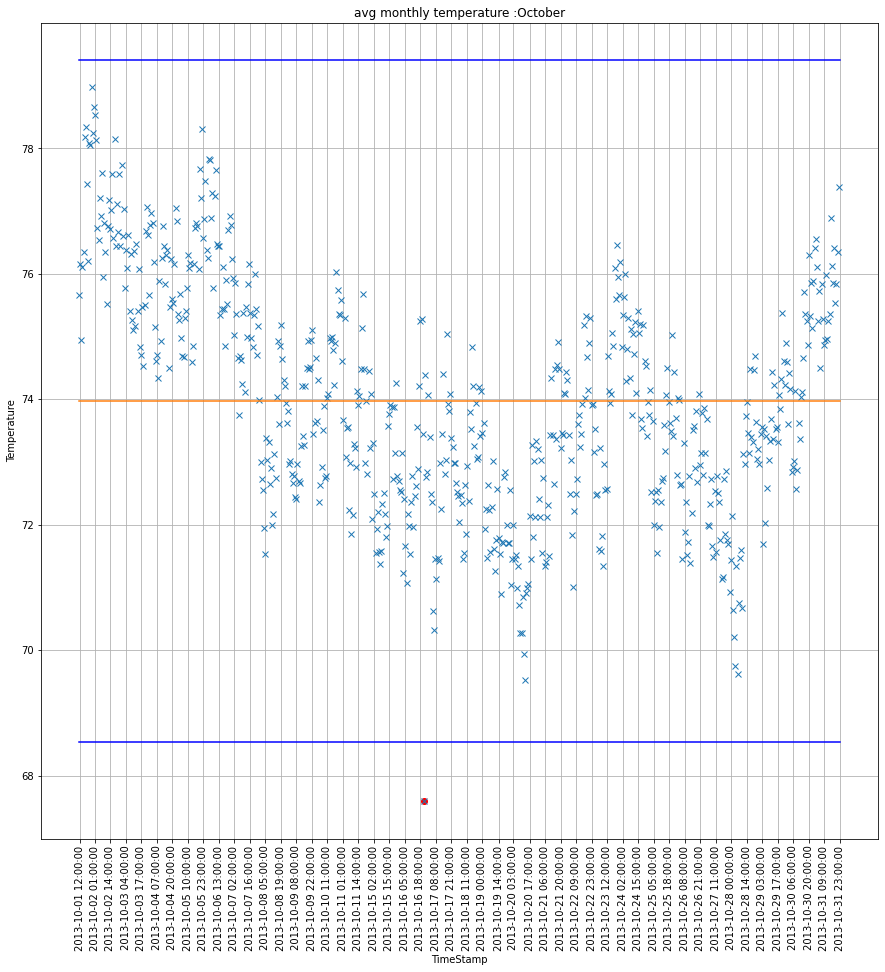

               timestamp      value  DayOfWeek  ...  hour  DayOfMonths  rolling_mean
2115 2013-10-16 22:00:00  67.592208  Wednesday  ...    22           31     73.159427

[1 rows x 7 columns]
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
2477 3196 720


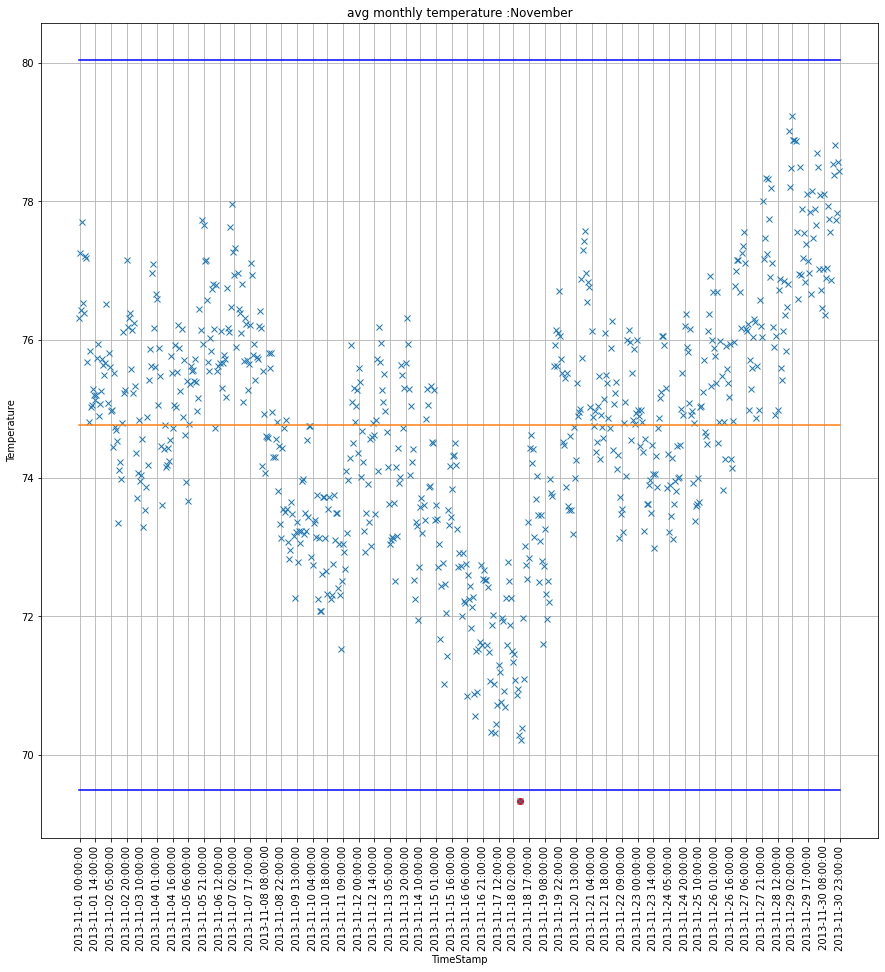

               timestamp      value DayOfWeek  ...  hour  DayOfMonths  rolling_mean
2894 2013-11-18 09:00:00  69.324892    Monday  ...     9           30     70.497257

[1 rows x 7 columns]
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
3197 3940 744


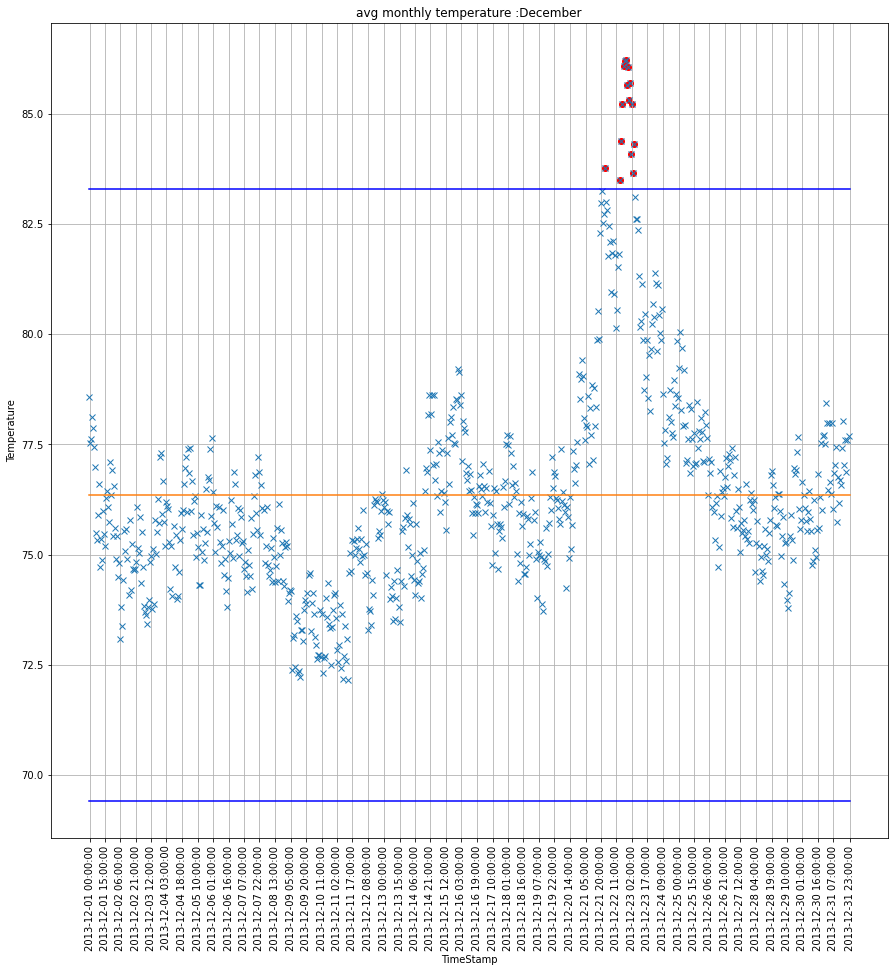

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
               timestamp      value DayOfWeek  ...  hour  DayOfMonths  rolling_mean
3702 2013-12-22 01:00:00  83.780995    Sunday  ...     1           31     83.055042
3717 2013-12-22 16:00:00  83.511630    Sunday  ...    16           31     81.514548
3718 2013-12-22 17:00:00  84.390932    Sunday  ...    17           31     82.364741
3719 2013-12-22 18:00:00  85.227685    Sunday  ...    18           31     83.298257
3720 2013-12-22 19:00:00  86.094888    Sunday  ...    19           31     84.211040
3721 2013-12-22 20:00:00  86.204189    Sunday  ...    20           31     85.085865
3722 2013-12-22 21:00:00  86.223213    Sunday  ...    21           31     85.628182
3723 2013-12-22 22:00:00  85.649437    Sunday  ...    22           31     85.879883
3724 2013-12-22 23:00:00  86.074710    Sunday  ...    23           31     86.049288
3725 2013-12-23 00:00:00  85.326165    Monday  ...     

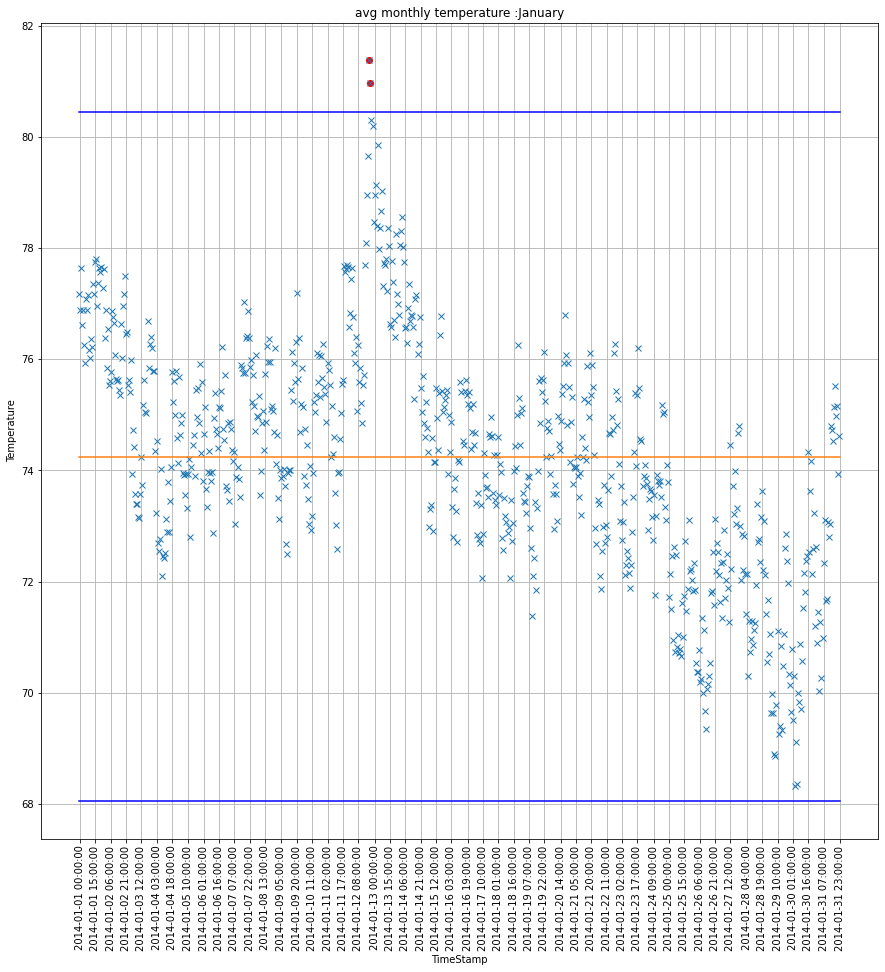

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
               timestamp      value DayOfWeek  ...  hour  DayOfMonths  rolling_mean
4225 2014-01-12 20:00:00  81.376188    Sunday  ...    20           31     79.151277
4226 2014-01-12 21:00:00  80.969475    Sunday  ...    21           31     79.805854

[2 rows x 7 columns]
4685 5356 672


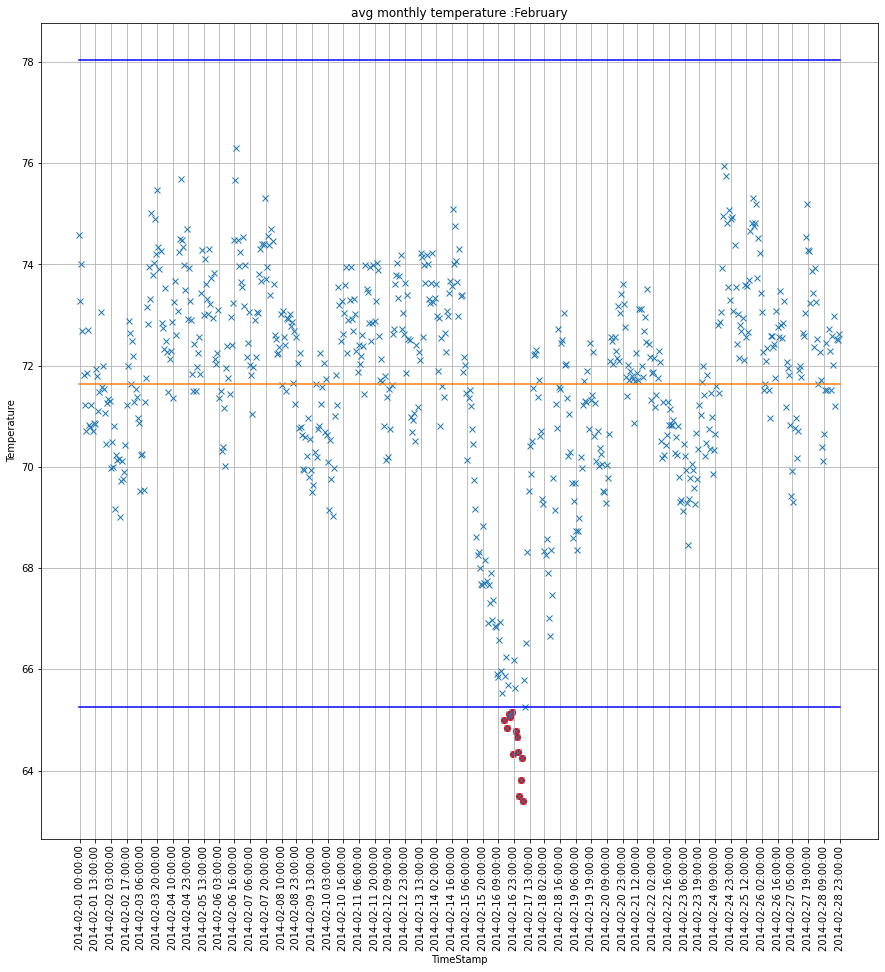

               timestamp      value DayOfWeek  ...  hour  DayOfMonths  rolling_mean
5060 2014-02-16 15:00:00  65.006547    Sunday  ...    15           28     65.999941
5063 2014-02-16 18:00:00  64.842407    Sunday  ...    18           28     65.496950
5065 2014-02-16 20:00:00  65.119222    Sunday  ...    20           28     65.554341
5066 2014-02-16 21:00:00  65.069276    Sunday  ...    21           28     65.395962
5067 2014-02-16 22:00:00  65.163815    Sunday  ...    22           28     65.178934
5068 2014-02-16 23:00:00  64.328171    Sunday  ...    23           28     65.076087
5071 2014-02-17 02:00:00  64.790756    Monday  ...     2           28     65.220654
5072 2014-02-17 03:00:00  64.674285    Monday  ...     3           28     65.122748
5073 2014-02-17 04:00:00  64.369808    Monday  ...     4           28     65.131075
5074 2014-02-17 05:00:00  63.500985    Monday  ...     5           28     64.595489
5075 2014-02-17 06:00:00  63.815341    Monday  ...     6           28     64

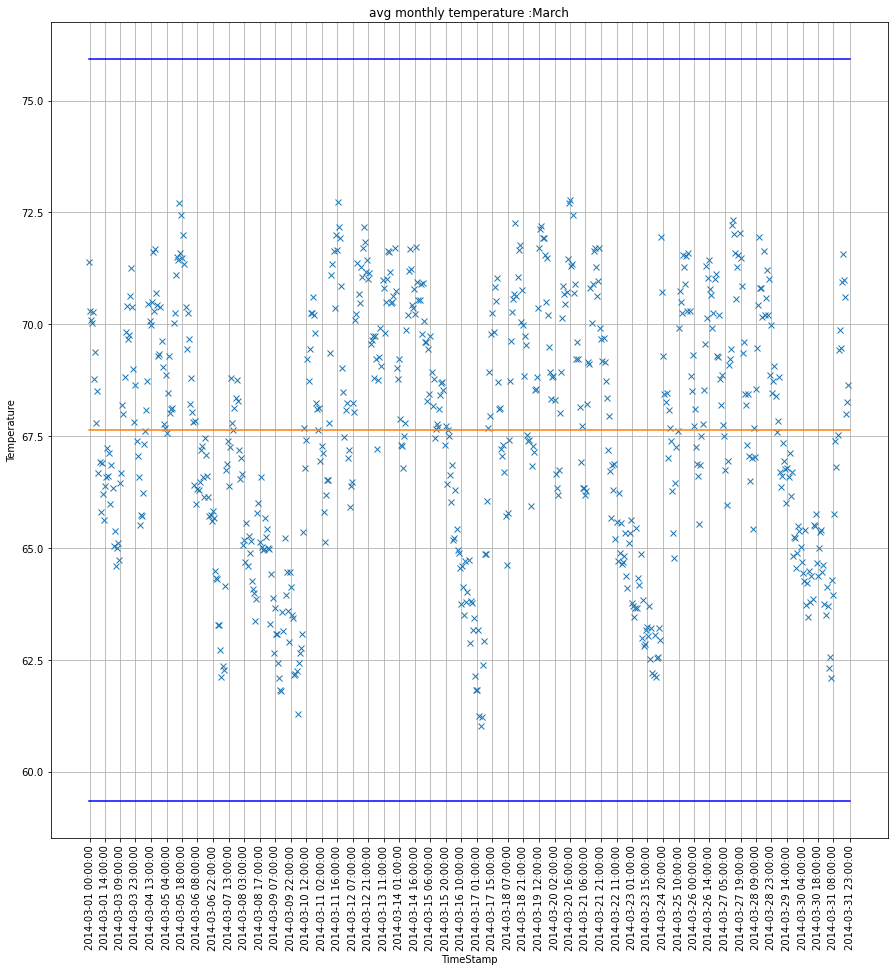

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
6056 6602 547


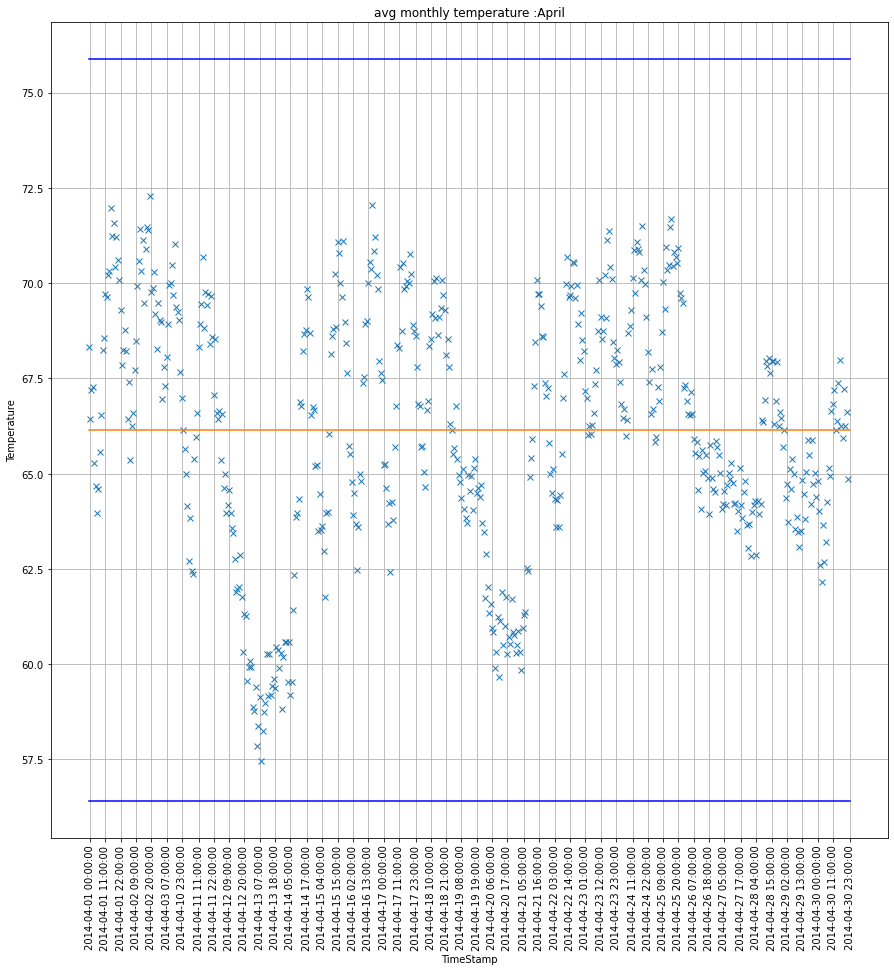

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
6603 7266 664


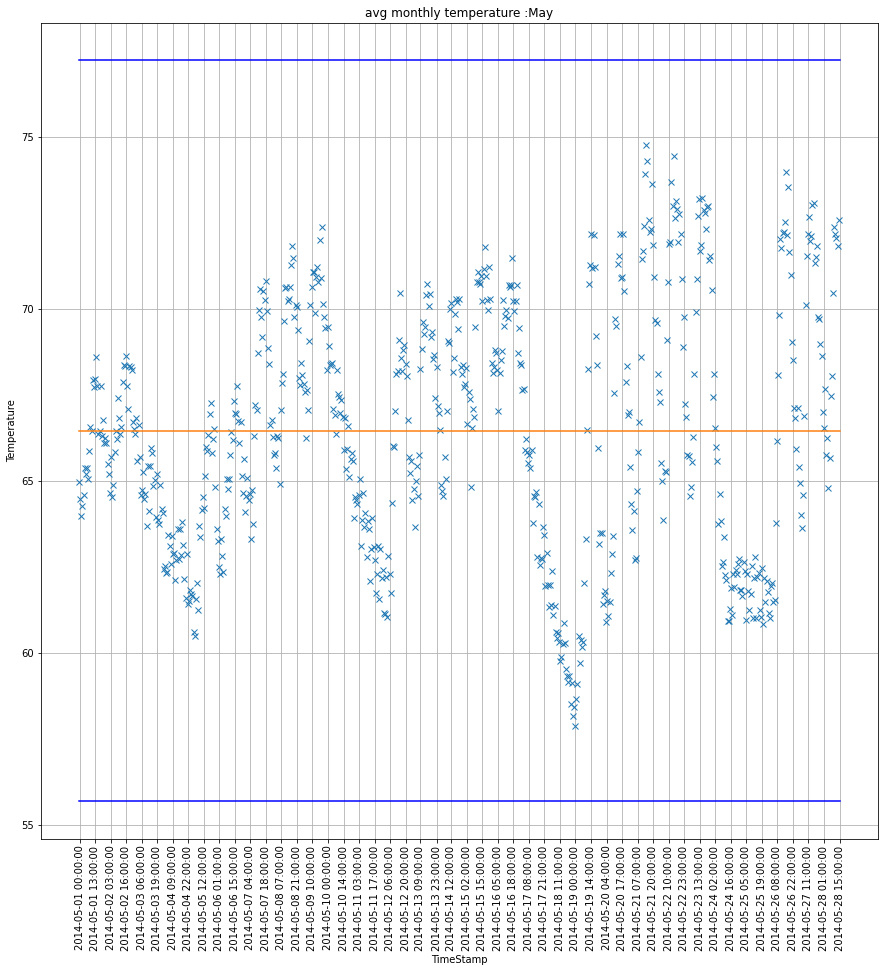

Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []
Empty DataFrame
Columns: [timestamp, value, DayOfWeek, month, hour, DayOfMonths, rolling_mean]
Index: []


In [ ]:
plt.figure(figsize=(20, 20))

for i in [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]:
    plt.figure(figsize=(15, 15))

    compute_mean_and_std(i)



# Following are the anamolies as per the statistical method we followed:

In [ ]:

anamolies = pd.concat([monthly_Highervalues, monthly_Lowervalues, yearly_Highervalues, yearly_Lowervalues],join= "inner")

print(anamolies)

               timestamp      value  DayOfWeek  ...  hour  DayOfMonths  rolling_mean
2115 2013-10-16 22:00:00  67.592208  Wednesday  ...    22           31     73.159427
2894 2013-11-18 09:00:00  69.324892     Monday  ...     9           30     70.497257
5060 2014-02-16 15:00:00  65.006547     Sunday  ...    15           28     65.999941
5063 2014-02-16 18:00:00  64.842407     Sunday  ...    18           28     65.496950
5065 2014-02-16 20:00:00  65.119222     Sunday  ...    20           28     65.554341
5066 2014-02-16 21:00:00  65.069276     Sunday  ...    21           28     65.395962
5067 2014-02-16 22:00:00  65.163815     Sunday  ...    22           28     65.178934
5068 2014-02-16 23:00:00  64.328171     Sunday  ...    23           28     65.076087
5071 2014-02-17 02:00:00  64.790756     Monday  ...     2           28     65.220654
5072 2014-02-17 03:00:00  64.674285     Monday  ...     3           28     65.122748
5073 2014-02-17 04:00:00  64.369808     Monday  ...     4        

In [ ]:
print(anamolies.month)

2115    10
2894    11
5060     2
5063     2
5065     2
5066     2
5067     2
5068     2
5071     2
5072     2
5073     2
5074     2
5075     2
5076     2
5077     2
3702    12
3717    12
3718    12
3719    12
3720    12
3721    12
3722    12
3723    12
3724    12
3725    12
3726    12
3727    12
3728    12
3729    12
3730    12
4225     1
4226     1
3718    12
3719    12
3720    12
3721    12
3722    12
3723    12
3724    12
3725    12
3726    12
3727    12
3728    12
3730    12
6177     4
6178     4
6180     4
6181     4
7034     5
7035     5
7036     5
Name: month, dtype: int64


## Observation from the anamolies 
1. Most of the anamolies are from Mondays or Sundays 
2. Most anamolies are after office hours or before office hours ( Early morning or late night).
3. Most anamolies are from August(2), November(4), December(5), May(12)